In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
img = cv2.imread('/content/Screenshot 2024-07-21 at 10.24.25 PM.png', cv2.IMREAD_GRAYSCALE)

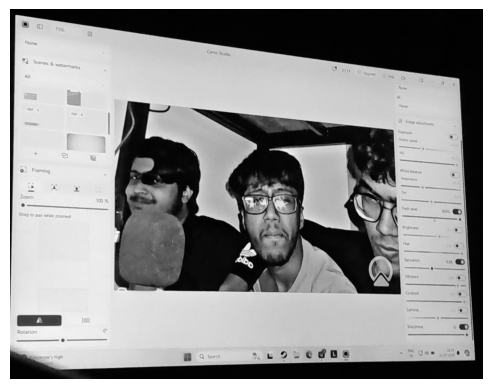

In [13]:
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.show()

In [14]:
# Function made for "Gray-Level Co-Occurrence Matrix (GLCM)" Calculation

def calculate_glcm(image, d, theta):
    glcm = np.zeros((256, 256))
    for i in range(image.shape[0] - d):
        for j in range(image.shape[1] - d):
            if theta == 0:
                x = image[i, j]
                y = image[i + d, j]
            elif theta == 45:
                x = image[i, j]
                y = image[i + d, j + d]
            elif theta == 90:
                x = image[i, j]
                y = image[i, j + d]
            elif theta == 135:
                x = image[i, j]
                y = image[i - d, j + d]
            glcm[x, y] += 1
    return glcm

In [7]:
def calculate_glcm_properties(glcm):
    contrast = np.sum(glcm * (glcm.shape[0] - np.arange(glcm.shape[0])) ** 2)
    homogeneity = np.sum(glcm / (1 + (glcm.shape[0] - np.arange(glcm.shape[0])) ** 2))
    energy = np.sum(glcm ** 2)
    correlation = np.sum(glcm * np.arange(glcm.shape[0]) * np.arange(glcm.shape[1]))
    return contrast, homogeneity, energy, correlation

In [15]:
glcm = calculate_glcm(img, 1, 0)
contrast, homogeneity, energy, correlation = calculate_glcm_properties(glcm)

Contrast: 32272902280.0
Homogeneity: 570.9324064807316
Energy: 16996430311.0
Correlation: 38338883720.0


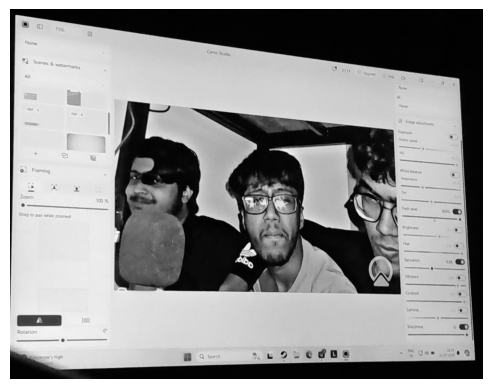

In [17]:
print("Contrast:", contrast)
print("Homogeneity:", homogeneity)
print("Energy:", energy)
print("Correlation:", correlation)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
'''

"Code can be run with relative simplicity and ease if module 'skimage' module can run in the system."

Code:
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops

# Load the image
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the GLCM
glcm = greycomatrix(img, [5], [0], symmetric=True, normed=True)

# Calculate the GLCM properties
contrast = greycoprops(glcm, prop='contrast')
homogeneity = greycoprops(glcm, prop='homogeneity')
energy = greycoprops(glcm, prop='energy')
correlation = greycoprops(glcm, prop='correlation')

# Print the GLCM properties
print("Contrast:", contrast)
print("Homogeneity:", homogeneity)
print("Energy:", energy)
print("Correlation:", correlation)

'''